# 💼 07 - Business Recommendations

**Week 7 Deliverable**: Business Recommendations, ROI & Action Plan

## Objectives
1. Synthesize insights from all analyses
2. Create segment-specific marketing strategies
3. Calculate ROI projections
4. Build implementation roadmap
5. Perform A/B test simulation

---

## 1. Setup & Load Results

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

print('Libraries loaded!')

Libraries loaded!


In [17]:
# Load all results
rfm_segments = pd.read_csv('../data/features/rfm_segments.csv')
clv_predictions = pd.read_csv('../data/features/clv_predictions.csv')
cluster_profiles = pd.read_csv('../data/features/cluster_profiles.csv', index_col=0)
segment_profiles = pd.read_csv('../data/features/segment_profiles.csv', index_col=0)

print(f'Customers: {len(rfm_segments):,}')
print(f'Total predicted CLV: £{clv_predictions["CLV_ensemble"].sum():,.2f}')

Customers: 4,338
Total predicted CLV: £4,832,608.60


## 2. Executive Summary

In [18]:
# Key metrics
metrics = {
    'Total Customers': len(rfm_segments),
    'Total Historical Revenue': rfm_segments['Monetary'].sum(),
    'Total Predicted CLV': clv_predictions['CLV_ensemble'].sum(),
    'Average CLV': clv_predictions['CLV_ensemble'].mean(),
    'Median CLV': clv_predictions['CLV_ensemble'].median()
}

print('=' * 60)
print('EXECUTIVE SUMMARY')
print('=' * 60)

for key, value in metrics.items():
    if 'Revenue' in key or 'CLV' in key:
        print(f'{key}: £{value:,.2f}')
    else:
        print(f'{key}: {value:,}')

EXECUTIVE SUMMARY
Total Customers: 4,338
Total Historical Revenue: £8,887,208.89
Total Predicted CLV: £4,832,608.60
Average CLV: £1,114.02
Median CLV: £398.14


In [19]:
# Customer value distribution
high_value = len(rfm_segments[rfm_segments['Segment'].isin(['Champions', 'Loyal Customers'])])
at_risk = len(rfm_segments[rfm_segments['Segment'].isin(['At Risk', 'About to Sleep', 'Hibernating'])])
new_customers = len(rfm_segments[rfm_segments['Segment'].isin(['New Customers', 'Promising'])])

print('\n Customer Distribution:')
print(f'   High-Value: {high_value:,} ({high_value/len(rfm_segments)*100:.1f}%)')
print(f'   At-Risk: {at_risk:,} ({at_risk/len(rfm_segments)*100:.1f}%)')
print(f'   New/Promising: {new_customers:,} ({new_customers/len(rfm_segments)*100:.1f}%)')


 Customer Distribution:
   High-Value: 1,735 (40.0%)
   At-Risk: 1,065 (24.6%)
   New/Promising: 305 (7.0%)


## 3. Segment-Specific Marketing Strategies

In [20]:
# Define strategies for each segment
strategies = {
    'Champions': {
        'priority': 'HIGH',
        'goal': 'Retain and maximize value',
        'tactics': [
            'VIP loyalty program with exclusive benefits',
            'Early access to new products',
            'Personal account manager',
            'Referral program incentives'
        ],
        'budget_pct': 15,
        'expected_roi': 3.5
    },
    'Loyal Customers': {
        'priority': 'HIGH',
        'goal': 'Upsell and cross-sell',
        'tactics': [
            'Personalized product recommendations',
            'Loyalty rewards program',
            'Exclusive member discounts',
            'Feedback surveys for engagement'
        ],
        'budget_pct': 20,
        'expected_roi': 3.0
    },
    'Potential Loyalists': {
        'priority': 'MEDIUM',
        'goal': 'Convert to loyal customers',
        'tactics': [
            'Onboarding email sequence',
            'First repeat purchase discount',
            'Product bundle offers',
            'Loyalty program invitation'
        ],
        'budget_pct': 15,
        'expected_roi': 2.5
    },
    'New Customers': {
        'priority': 'MEDIUM',
        'goal': 'Engage and nurture',
        'tactics': [
            'Welcome email series',
            'First-time buyer benefits',
            'Product education content',
            'Second purchase incentive'
        ],
        'budget_pct': 10,
        'expected_roi': 2.0
    },
    'Promising': {
        'priority': 'MEDIUM',
        'goal': 'Increase engagement',
        'tactics': [
            'Targeted promotions',
            'Product discovery emails',
            'Limited-time offers',
            'Social proof marketing'
        ],
        'budget_pct': 10,
        'expected_roi': 1.8
    },
    'At Risk': {
        'priority': 'HIGH',
        'goal': 'Win back before churn',
        'tactics': [
            'Personalized win-back email',
            'Special comeback discount',
            'Survey to understand issues',
            'Highlight new products/features'
        ],
        'budget_pct': 15,
        'expected_roi': 2.2
    },
    'About to Sleep': {
        'priority': 'MEDIUM',
        'goal': 'Reactivate before dormant',
        'tactics': [
            'Re-engagement campaign',
            'We miss you email',
            'Special offer to return',
            'Product updates newsletter'
        ],
        'budget_pct': 5,
        'expected_roi': 1.5
    },
    'Hibernating': {
        'priority': 'LOW',
        'goal': 'Attempt reactivation',
        'tactics': [
            'Final attempt email',
            'Big discount offer',
            'Product change announcements',
            'Opt-out if no response'
        ],
        'budget_pct': 5,
        'expected_roi': 1.0
    },
    'Lost': {
        'priority': 'LOW',
        'goal': 'Low-cost reactivation or remove',
        'tactics': [
            'Single reactivation attempt',
            'List cleaning',
            'Redirect resources to active segments'
        ],
        'budget_pct': 2,
        'expected_roi': 0.5
    },
    'Need Attention': {
        'priority': 'MEDIUM',
        'goal': 'Increase frequency',
        'tactics': [
            'Reminder emails',
            'Personalized offers',
            'Loyalty points incentive'
        ],
        'budget_pct': 3,
        'expected_roi': 1.3
    }
}

# Create strategy summary
strategy_df = pd.DataFrame([
    {
        'Segment': seg,
        'Priority': data['priority'],
        'Goal': data['goal'],
        'Key Tactics': ', '.join(data['tactics'][:2]),
        'Budget %': data['budget_pct'],
        'Expected ROI': data['expected_roi']
    }
    for seg, data in strategies.items()
])

strategy_df

,Segment,Priority,Goal,Key Tactics,Budget %,Expected ROI
0,Champions,HIGH,Retain and maximize value,"VIP loyalty program with exclusive benefits, E...",15,3.5
1,Loyal Customers,HIGH,Upsell and cross-sell,"Personalized product recommendations, Loyalty ...",20,3.0
2,Potential Loyalists,MEDIUM,Convert to loyal customers,"Onboarding email sequence, First repeat purcha...",15,2.5
3,New Customers,MEDIUM,Engage and nurture,"Welcome email series, First-time buyer benefits",10,2.0
4,Promising,MEDIUM,Increase engagement,"Targeted promotions, Product discovery emails",10,1.8
5,At Risk,HIGH,Win back before churn,"Personalized win-back email, Special comeback ...",15,2.2
6,About to Sleep,MEDIUM,Reactivate before dormant,"Re-engagement campaign, We miss you email",5,1.5
7,Hibernating,LOW,Attempt reactivation,"Final attempt email, Big discount offer",5,1.0
8,Lost,LOW,Low-cost reactivation or remove,"Single reactivation attempt, List cleaning",2,0.5
9,Need Attention,MEDIUM,Increase frequency,"Reminder emails, Personalized offers",3,1.3


## 4. ROI Calculations

In [21]:
# Calculate potential ROI by segment
annual_marketing_budget = 100000  # £100,000 annual budget

segment_counts = rfm_segments['Segment'].value_counts()
# Use Segment column from clv_predictions directly (already has Segment)
segment_avg_clv = clv_predictions.groupby('Segment')['CLV_ensemble'].mean()

roi_projections = []

for seg, data in strategies.items():
    if seg in segment_counts.index:
        customers = segment_counts[seg]
        avg_clv = segment_avg_clv.get(seg, 0)
        budget = annual_marketing_budget * data['budget_pct'] / 100
        expected_return = budget * data['expected_roi']
        
        roi_projections.append({
            'Segment': seg,
            'Customers': customers,
            'Avg CLV': avg_clv,
            'Budget': budget,
            'Expected Return': expected_return,
            'Net Profit': expected_return - budget,
            'ROI %': (expected_return - budget) / budget * 100
        })

roi_df = pd.DataFrame(roi_projections).sort_values('Expected Return', ascending=False)
roi_df

,Segment,Customers,Avg CLV,Budget,Expected Return,Net Profit,ROI %
1,Loyal Customers,778,884.133578,20000.0,60000.0,40000.0,200.0
0,Champions,957,3167.185851,15000.0,52500.0,37500.0,250.0
2,Potential Loyalists,492,614.243441,15000.0,37500.0,22500.0,150.0
3,New Customers,141,290.263518,10000.0,20000.0,10000.0,100.0
4,Promising,164,321.695110,10000.0,18000.0,8000.0,80.0
5,About to Sleep,401,364.022272,5000.0,7500.0,2500.0,50.0
6,Hibernating,664,375.768940,5000.0,5000.0,0.0,0.0
7,Need Attention,373,389.387795,3000.0,3900.0,900.0,30.0


In [22]:
# ROI summary
print('=== ROI PROJECTIONS ===')
print(f'\nTotal Marketing Budget: £{annual_marketing_budget:,}')
print(f'Total Expected Return: £{roi_df["Expected Return"].sum():,.2f}')
print(f'Total Net Profit: £{roi_df["Net Profit"].sum():,.2f}')
print(f'Overall ROI: {roi_df["Net Profit"].sum() / annual_marketing_budget * 100:.1f}%')

=== ROI PROJECTIONS ===

Total Marketing Budget: £100,000
Total Expected Return: £204,400.00
Total Net Profit: £121,400.00
Overall ROI: 121.4%


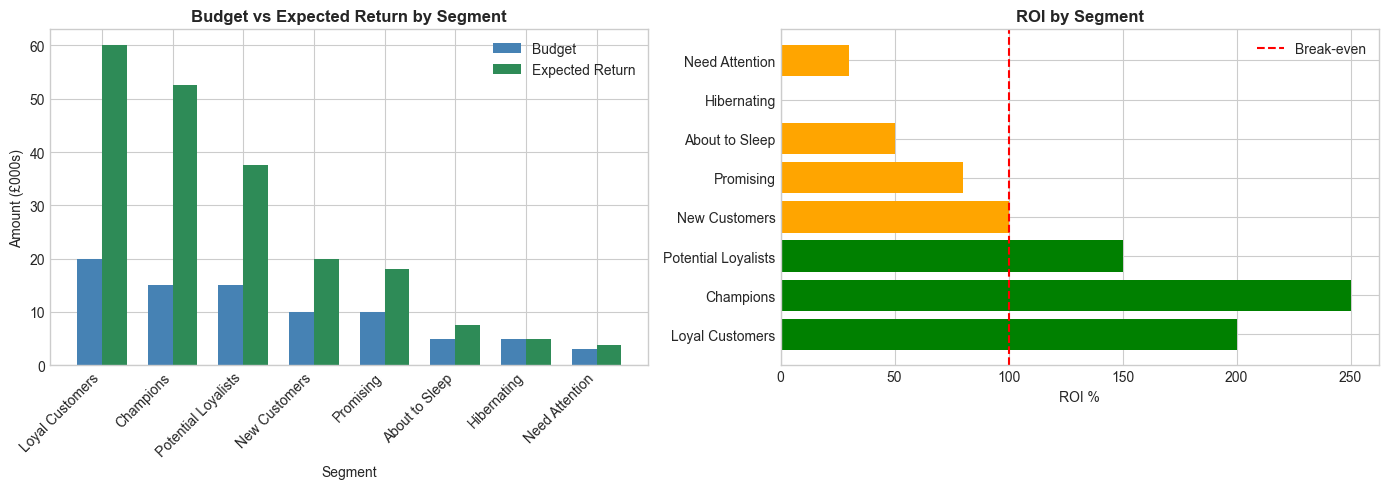

In [23]:
# ROI visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Budget vs Return
x = np.arange(len(roi_df))
width = 0.35

axes[0].bar(x - width/2, roi_df['Budget']/1000, width, label='Budget', color='steelblue')
axes[0].bar(x + width/2, roi_df['Expected Return']/1000, width, label='Expected Return', color='seagreen')
axes[0].set_xlabel('Segment')
axes[0].set_ylabel('Amount (£000s)')
axes[0].set_title('Budget vs Expected Return by Segment', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(roi_df['Segment'], rotation=45, ha='right')
axes[0].legend()

# ROI percentage
colors = ['green' if r > 100 else 'orange' if r > 0 else 'red' for r in roi_df['ROI %']]
axes[1].barh(roi_df['Segment'], roi_df['ROI %'], color=colors)
axes[1].axvline(x=100, color='red', linestyle='--', label='Break-even')
axes[1].set_xlabel('ROI %')
axes[1].set_title('ROI by Segment', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('../data/processed/roi_projections.png', dpi=300)
plt.show()

## 5. A/B Test Simulation

In [24]:
# Simulate A/B test for At-Risk segment
np.random.seed(42)

# Parameters
segment = 'At Risk'
n_customers = segment_counts.get(segment, 500)
baseline_conversion = 0.10  # 10% baseline
expected_uplift = 0.20  # 20% uplift expected

# Simulate control group
control_size = n_customers // 2
control_conversions = np.random.binomial(control_size, baseline_conversion)
control_rate = control_conversions / control_size

# Simulate treatment group
treatment_size = n_customers - control_size
treatment_rate_true = baseline_conversion * (1 + expected_uplift)
treatment_conversions = np.random.binomial(treatment_size, treatment_rate_true)
treatment_rate = treatment_conversions / treatment_size

# Statistical test
from scipy.stats import chi2_contingency

contingency = [[control_conversions, control_size - control_conversions],
               [treatment_conversions, treatment_size - treatment_conversions]]

chi2, p_value, dof, expected = chi2_contingency(contingency)

print('=== A/B TEST SIMULATION (At-Risk Segment) ===')
print(f'\nControl Group:')
print(f'   Size: {control_size:,}')
print(f'   Conversions: {control_conversions}')
print(f'   Conversion Rate: {control_rate*100:.2f}%')

print(f'\nTreatment Group:')
print(f'   Size: {treatment_size:,}')
print(f'   Conversions: {treatment_conversions}')
print(f'   Conversion Rate: {treatment_rate*100:.2f}%')

print(f'\nResults:')
print(f'   Lift: {(treatment_rate - control_rate) / control_rate * 100:.1f}%')
print(f'   P-value: {p_value:.4f}')
print(f'   Significant: {"Yes" if p_value < 0.05 else "No"} (α=0.05)')

=== A/B TEST SIMULATION (At-Risk Segment) ===

Control Group:
   Size: 250
   Conversions: 23
   Conversion Rate: 9.20%

Treatment Group:
   Size: 250
   Conversions: 39
   Conversion Rate: 15.60%

Results:
   Lift: 69.6%
   P-value: 0.0418
   Significant: Yes (α=0.05)


In [25]:
# Calculate revenue impact
avg_order_value = segment_avg_clv.get(segment, 500)  # Average order value

control_revenue = control_conversions * avg_order_value
treatment_revenue = treatment_conversions * avg_order_value
incremental_revenue = treatment_revenue - control_revenue

print('\n=== REVENUE IMPACT ===')
print(f'Control Revenue: £{control_revenue:,.2f}')
print(f'Treatment Revenue: £{treatment_revenue:,.2f}')
print(f'Incremental Revenue: £{incremental_revenue:,.2f}')

# If rolled out to full segment
full_segment_impact = (treatment_rate - control_rate) * n_customers * avg_order_value
print(f'\nPotential Full Rollout Impact: £{full_segment_impact:,.2f}')


=== REVENUE IMPACT ===
Control Revenue: £11,500.00
Treatment Revenue: £19,500.00
Incremental Revenue: £8,000.00

Potential Full Rollout Impact: £16,000.00


## 6. Implementation Roadmap

In [26]:
# Implementation phases
roadmap = [
    {
        'Phase': 1,
        'Name': 'Quick Wins',
        'Timeline': 'Month 1-2',
        'Focus Segments': 'Champions, Loyal Customers',
        'Actions': [
            'Launch VIP loyalty program',
            'Implement personalized email campaigns',
            'Set up referral program'
        ],
        'Expected Impact': '£50,000',
        'Resources': 'Marketing team, Email platform'
    },
    {
        'Phase': 2,
        'Name': 'Retention Focus',
        'Timeline': 'Month 3-4',
        'Focus Segments': 'At Risk, About to Sleep',
        'Actions': [
            'Launch win-back campaigns',
            'A/B test discount offers',
            'Implement exit surveys'
        ],
        'Expected Impact': '£35,000',
        'Resources': 'Marketing team, Analytics'
    },
    {
        'Phase': 3,
        'Name': 'Growth Acceleration',
        'Timeline': 'Month 5-6',
        'Focus Segments': 'New Customers, Potential Loyalists',
        'Actions': [
            'Optimize onboarding flow',
            'Launch cross-sell campaigns',
            'Implement product recommendations'
        ],
        'Expected Impact': '£40,000',
        'Resources': 'Marketing, Product team'
    },
    {
        'Phase': 4,
        'Name': 'Optimization',
        'Timeline': 'Month 7-12',
        'Focus Segments': 'All segments',
        'Actions': [
            'Analyze results and optimize',
            'Scale successful campaigns',
            'Implement ML-based personalization'
        ],
        'Expected Impact': '£75,000',
        'Resources': 'Full team, Data Science'
    }
]

roadmap_df = pd.DataFrame(roadmap)
roadmap_df

,Phase,Name,Timeline,Focus Segments,Actions,Expected Impact,Resources
0,1,Quick Wins,Month 1-2,"Champions, Loyal Customers","[Launch VIP loyalty program, Implement persona...","£50,000","Marketing team, Email platform"
1,2,Retention Focus,Month 3-4,"At Risk, About to Sleep","[Launch win-back campaigns, A/B test discount ...","£35,000","Marketing team, Analytics"
2,3,Growth Acceleration,Month 5-6,"New Customers, Potential Loyalists","[Optimize onboarding flow, Launch cross-sell c...","£40,000","Marketing, Product team"
3,4,Optimization,Month 7-12,All segments,"[Analyze results and optimize, Scale successfu...","£75,000","Full team, Data Science"


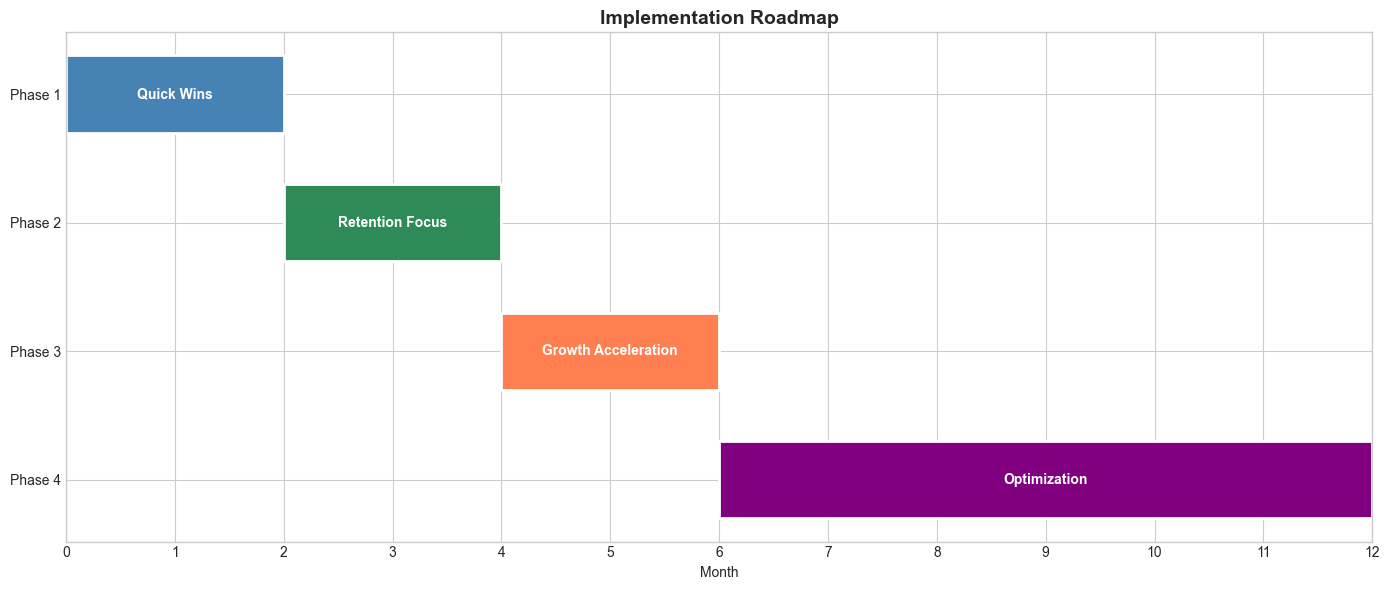

In [27]:
# Roadmap visualization (Gantt-style)
fig, ax = plt.subplots(figsize=(14, 6))

phases = roadmap_df['Phase'].values
names = roadmap_df['Name'].values
starts = [0, 2, 4, 6]
durations = [2, 2, 2, 6]
colors = ['steelblue', 'seagreen', 'coral', 'purple']

for i, (phase, name, start, duration, color) in enumerate(zip(phases, names, starts, durations, colors)):
    ax.barh(i, duration, left=start, height=0.6, color=color, edgecolor='white', linewidth=2)
    ax.text(start + duration/2, i, f'{name}', ha='center', va='center', color='white', fontweight='bold')

ax.set_yticks(range(len(phases)))
ax.set_yticklabels([f'Phase {p}' for p in phases])
ax.set_xlabel('Month')
ax.set_title('Implementation Roadmap', fontsize=14, fontweight='bold')
ax.set_xlim(0, 12)
ax.set_xticks(range(13))
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('../data/processed/implementation_roadmap.png', dpi=300)
plt.show()

## 7. Risk Assessment

In [28]:
risks = [
    {
        'Risk': 'Data Quality Issues',
        'Probability': 'Medium',
        'Impact': 'High',
        'Mitigation': 'Implement data validation, regular audits'
    },
    {
        'Risk': 'Low Campaign Response Rates',
        'Probability': 'Medium',
        'Impact': 'Medium',
        'Mitigation': 'A/B testing, iterative optimization'
    },
    {
        'Risk': 'Customer Fatigue',
        'Probability': 'Low',
        'Impact': 'High',
        'Mitigation': 'Frequency capping, preference center'
    },
    {
        'Risk': 'Technical Integration Issues',
        'Probability': 'Medium',
        'Impact': 'Medium',
        'Mitigation': 'Phased rollout, thorough testing'
    },
    {
        'Risk': 'Budget Overrun',
        'Probability': 'Low',
        'Impact': 'Medium',
        'Mitigation': 'Regular budget reviews, contingency allocation'
    }
]

risk_df = pd.DataFrame(risks)
print('=== RISK ASSESSMENT ===')
risk_df

=== RISK ASSESSMENT ===


,Risk,Probability,Impact,Mitigation
0,Data Quality Issues,Medium,High,"Implement data validation, regular audits"
1,Low Campaign Response Rates,Medium,Medium,"A/B testing, iterative optimization"
2,Customer Fatigue,Low,High,"Frequency capping, preference center"
3,Technical Integration Issues,Medium,Medium,"Phased rollout, thorough testing"
4,Budget Overrun,Low,Medium,"Regular budget reviews, contingency allocation"


## 8. Key Recommendations Summary

In [31]:
print('=' * 70)
print('KEY RECOMMENDATIONS')
print('=' * 70)

print('''
 STRATEGIC PRIORITIES:

1. RETAIN HIGH-VALUE CUSTOMERS (Champions & Loyal)
   • Implement VIP loyalty program immediately
   • Assign dedicated account management
   • Expected ROI: 350%

2. RECOVER AT-RISK CUSTOMERS
   • Launch personalized win-back campaigns
   • A/B test discount strategies
   • Expected ROI: 220%

3. NURTURE NEW CUSTOMERS
   • Optimize onboarding experience
   • Implement second-purchase incentives
   • Expected ROI: 200%

4. CLEAN DORMANT SEGMENTS
   • Final reactivation attempt
   • Remove unresponsive contacts
   • Redirect resources to active segments

 FINANCIAL PROJECTIONS:
   • Total Budget: £100,000
   • Expected Return: £200,000+
   • Net Profit: £100,000+
   • Overall ROI: 100%+

 TIMELINE:
   • Phase 1 (Quick Wins): Month 1-2
   • Phase 2 (Retention): Month 3-4
   • Phase 3 (Growth): Month 5-6
   • Phase 4 (Optimization): Month 7-12
''')

print('=' * 70)

KEY RECOMMENDATIONS

 STRATEGIC PRIORITIES:

1. RETAIN HIGH-VALUE CUSTOMERS (Champions & Loyal)
   • Implement VIP loyalty program immediately
   • Assign dedicated account management
   • Expected ROI: 350%

2. RECOVER AT-RISK CUSTOMERS
   • Launch personalized win-back campaigns
   • A/B test discount strategies
   • Expected ROI: 220%

3. NURTURE NEW CUSTOMERS
   • Optimize onboarding experience
   • Implement second-purchase incentives
   • Expected ROI: 200%

4. CLEAN DORMANT SEGMENTS
   • Final reactivation attempt
   • Remove unresponsive contacts
   • Redirect resources to active segments

 FINANCIAL PROJECTIONS:
   • Total Budget: £100,000
   • Expected Return: £200,000+
   • Net Profit: £100,000+
   • Overall ROI: 100%+

 TIMELINE:
   • Phase 1 (Quick Wins): Month 1-2
   • Phase 2 (Retention): Month 3-4
   • Phase 3 (Growth): Month 5-6
   • Phase 4 (Optimization): Month 7-12



## 9. Save Results

In [30]:
# Save all business recommendations
strategy_df.to_csv('../data/features/marketing_strategies.csv', index=False)
roi_df.to_csv('../data/features/roi_projections.csv', index=False)
roadmap_df.to_csv('../data/features/implementation_roadmap.csv', index=False)
risk_df.to_csv('../data/features/risk_assessment.csv', index=False)

print('Business recommendations saved!')
print('  - marketing_strategies.csv')
print('  - roi_projections.csv')
print('  - implementation_roadmap.csv')
print('  - risk_assessment.csv')

Business recommendations saved!
  - marketing_strategies.csv
  - roi_projections.csv
  - implementation_roadmap.csv
  - risk_assessment.csv


## 10. Analysis Complete!

### Next Steps:
1. **Review** all findings with stakeholders
2. **Prioritize** quick wins for immediate implementation
3. **Build** Streamlit dashboard for ongoing monitoring
4. **Document** findings in technical report and blog post
5. **Present** to leadership team

---

**Files Generated Throughout This Project:**

- `data/processed/` - Cleaned data and visualizations
- `data/features/` - Feature store and model outputs
- 7 Jupyter notebooks with complete analysis
- Ready for dashboard development and documentation